In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


In [2]:
train_file = r'D:/Padmaja/EdvancerClass/Jupyternotebook/Python_Project3/counterfeit_train.csv'
test_file=r'D:/Padmaja/EdvancerClass/Jupyternotebook/Python_Project3/counterfeit_test.csv'
con_train =pd.read_csv(train_file)
con_test = pd.read_csv(test_file)

In [3]:
con_train.head()

,Medicine_ID,Counterfeit_Weight,DistArea_ID,Active_Since,Medicine_MRP,Medicine_Type,SidEffect_Level,Availability_rating,Area_Type,Area_City_Type,Area_dist_level,Counterfeit_Sales
0,RRA15,13.100,Area046,1995,160.2366,Antimalarial,critical,0.070422,DownTown,Tier 1,Small,1775.5026
1,YVV26,NaN,Area027,1983,110.4384,Mstablizers,mild,0.013000,CityLimits,Tier 3,Medium,3069.1520
2,LJC15,9.025,Area046,1995,259.4092,Cardiac,mild,0.060783,DownTown,Tier 1,Small,2603.0920
3,GWC40,11.800,Area046,1995,99.9830,OralContraceptives,mild,0.065555,DownTown,Tier 1,Small,1101.7130
4,QMN13,NaN,Area019,1983,56.4402,Hreplacements,critical,0.248859,MidTownResidential,Tier 1,Small,158.9402


In [4]:
con_test.head()

,Medicine_ID,Counterfeit_Weight,DistArea_ID,Active_Since,Medicine_MRP,Medicine_Type,SidEffect_Level,Availability_rating,Area_Type,Area_City_Type,Area_dist_level
0,HLZ81,NaN,Area027,1983,85.5328,Antibiotics,mild,0.112747,CityLimits,Tier 3,Medium
1,ECE94,13.45,Area045,2000,257.1460,OralContraceptives,mild,0.144446,DownTown,Tier 2,Unknown
2,SAD14,7.10,Area045,2000,98.1172,Antipyretics,mild,0.144221,DownTown,Tier 2,Unknown
3,EQV63,18.30,Area010,1996,135.3730,Tranquilizers,mild,0.100388,MidTownResidential,Tier 3,Unknown
4,AIR10,NaN,Area019,1983,112.8016,OralContraceptives,mild,0.022585,MidTownResidential,Tier 1,Small


In [5]:
con_test['Counterfeit_Sales'] = np.nan
con_train['data'] = 'train'
con_test['data'] = 'test'

con_all = pd.concat([con_train,con_test],axis=0)
con_all.reset_index(drop=True,inplace=True)

In [6]:
con_train.isnull().sum()

Medicine_ID               0
Counterfeit_Weight     1166
DistArea_ID               0
Active_Since              0
Medicine_MRP              0
Medicine_Type             0
SidEffect_Level           0
Availability_rating       0
Area_Type                 0
Area_City_Type            0
Area_dist_level           0
Counterfeit_Sales         0
data                      0
dtype: int64

In [7]:
con_train['Medicine_Type'].nunique()

16

In [119]:
con_train['Area_Type'].value_counts()

DownTown              4481
MidTownResidential     873
CityLimits             735
Industrial             729
Name: Area_Type, dtype: int64

In [8]:
con_train['Medicine_Type'].value_counts()

Hreplacements         976
Antibiotics           970
Antiseptics           724
OralContraceptives    694
Antipyretics          536
Cardiac               522
Mstablizers           514
Tranquilizers         420
Analgesics            356
Antimalarial          339
Antacids              206
Statins               167
MuscleRelaxants       139
Antifungal            111
Stimulants             95
Antiviral              49
Name: Medicine_Type, dtype: int64

In [127]:
np.min(con_train['Counterfeit_Sales'])

146.29

In [128]:
Q1 =con_train['Medicine_MRP'].quantile(0.25)
Q3 = con_train['Medicine_MRP'].quantile(0.75)
IQR = Q3-Q1
filt_train = con_train.query('(@Q1 - 1.5 * @IQR) <= Medicine_MRP <= (@Q3 + 1.5 * @IQR)')

In [9]:
import matplotlib.pyplot as pyplot
%matplotlib inline 

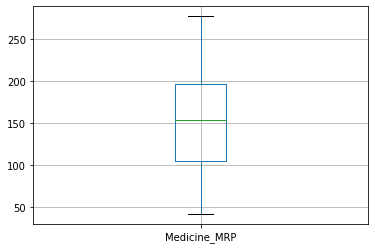

In [10]:
con_train.boxplot(column='Medicine_MRP')

{'whiskers': [<matplotlib.lines.Line2D at 0x1c1f2859c88>,
 'caps': [<matplotlib.lines.Line2D at 0x1c1f285cc48>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c1f279a908>],
 'medians': [<matplotlib.lines.Line2D at 0x1c1f2861bc8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c1f2861cc8>],
 'means': []}

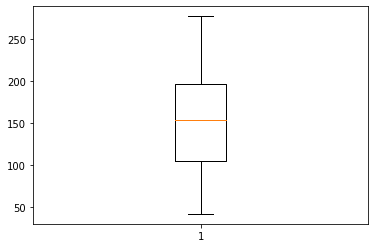

In [11]:
pyplot.boxplot(con_train['Medicine_MRP'])

In [129]:
filt_train

,Medicine_ID,Counterfeit_Weight,DistArea_ID,Active_Since,Medicine_MRP,Medicine_Type,SidEffect_Level,Availability_rating,Area_Type,Area_City_Type,Area_dist_level,Counterfeit_Sales,data
0,RRA15,13.100,Area046,1995,160.2366,Antimalarial,critical,0.070422,DownTown,Tier 1,Small,1775.5026,train
1,YVV26,NaN,Area027,1983,110.4384,Mstablizers,mild,0.013000,CityLimits,Tier 3,Medium,3069.1520,train
2,LJC15,9.025,Area046,1995,259.4092,Cardiac,mild,0.060783,DownTown,Tier 1,Small,2603.0920,train
3,GWC40,11.800,Area046,1995,99.9830,OralContraceptives,mild,0.065555,DownTown,Tier 1,Small,1101.7130,train
4,QMN13,NaN,Area019,1983,56.4402,Hreplacements,critical,0.248859,MidTownResidential,Tier 1,Small,158.9402,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6813,OYN80,8.535,Area046,1995,204.1452,Hreplacements,mild,0.112963,DownTown,Tier 1,Small,2070.4520,train
6814,ACW12,20.650,Area046,1995,235.1088,Hreplacements,mild,0.131103,DownTown,Tier 1,Small,2126.3792,train
6815,OPM10,20.000,Area017,2005,193.6292,Antimalarial,critical,0.105096,DownTown,Tier 2,Unknown,2119.7212,train
6816,SLY12,10.180,Area045,2000,162.8682,Statins,mild,0.099957,DownTown,Tier 2,Unknown,1485.2138,train


In [12]:
con_all['DistArea_ID'].value_counts()

Area027    935
Area013    932
Area049    930
Area046    930
Area035    930
Area045    929
Area018    928
Area017    926
Area010    555
Area019    528
Name: DistArea_ID, dtype: int64

In [13]:
con_all['Medicine_Type'].value_counts()

Antibiotics           1232
Hreplacements         1200
Antiseptics            910
OralContraceptives     856
Antipyretics           682
Cardiac                649
Mstablizers            648
Tranquilizers          520
Analgesics             445
Antimalarial           425
Antacids               251
Statins                214
MuscleRelaxants        169
Antifungal             148
Stimulants             110
Antiviral               64
Name: Medicine_Type, dtype: int64

In [14]:
con_all['SidEffect_Level'].value_counts()

mild        5517
critical    3006
Name: SidEffect_Level, dtype: int64

In [15]:
con_all['Area_Type'].value_counts()

DownTown              5577
MidTownResidential    1083
CityLimits             935
Industrial             928
Name: Area_Type, dtype: int64

In [16]:
con_all['Area_City_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Area_City_Type, dtype: int64

In [17]:
con_all['Area_dist_level'].value_counts()

Medium     2793
Unknown    2410
Small      2388
High        932
Name: Area_dist_level, dtype: int64

In [18]:
cols=['DistArea_ID','Medicine_Type','SidEffect_Level','Area_Type','Area_City_Type','Area_dist_level']

In [19]:
for col in cols:
    freqs=con_all[col].value_counts()
    k=freqs.index[freqs>100][:-1]
    for cat in k:
        name=col+'_'+cat
        con_all[name]=(con_all[col]==cat).astype(int)
    del con_all[col]
    print(col)

DistArea_ID
Medicine_Type
SidEffect_Level
Area_Type
Area_City_Type
Area_dist_level


In [20]:
con_all.head()

,Medicine_ID,Counterfeit_Weight,Active_Since,Medicine_MRP,Availability_rating,Counterfeit_Sales,data,DistArea_ID_Area027,DistArea_ID_Area013,DistArea_ID_Area049,...,Medicine_Type_Antifungal,SidEffect_Level_mild,Area_Type_DownTown,Area_Type_MidTownResidential,Area_Type_CityLimits,Area_City_Type_Tier 3,Area_City_Type_Tier 2,Area_dist_level_Medium,Area_dist_level_Unknown,Area_dist_level_Small
0,RRA15,13.100,1995,160.2366,0.070422,1775.5026,train,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,YVV26,NaN,1983,110.4384,0.013000,3069.1520,train,1,0,0,...,0,1,0,0,1,1,0,1,0,0
2,LJC15,9.025,1995,259.4092,0.060783,2603.0920,train,0,0,0,...,0,1,1,0,0,0,0,0,0,1
3,GWC40,11.800,1995,99.9830,0.065555,1101.7130,train,0,0,0,...,0,1,1,0,0,0,0,0,0,1
4,QMN13,NaN,1983,56.4402,0.248859,158.9402,train,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [21]:
con_all.dtypes

Medicine_ID                          object
Counterfeit_Weight                  float64
Active_Since                          int64
Medicine_MRP                        float64
Availability_rating                 float64
Counterfeit_Sales                   float64
data                                 object
DistArea_ID_Area027                   int32
DistArea_ID_Area013                   int32
DistArea_ID_Area049                   int32
DistArea_ID_Area046                   int32
DistArea_ID_Area035                   int32
DistArea_ID_Area045                   int32
DistArea_ID_Area018                   int32
DistArea_ID_Area017                   int32
DistArea_ID_Area010                   int32
Medicine_Type_Antibiotics             int32
Medicine_Type_Hreplacements           int32
Medicine_Type_Antiseptics             int32
Medicine_Type_OralContraceptives      int32
Medicine_Type_Antipyretics            int32
Medicine_Type_Cardiac                 int32
Medicine_Type_Mstablizers       

In [22]:
con_all.isnull().sum()

Medicine_ID                            0
Counterfeit_Weight                  1463
Active_Since                           0
Medicine_MRP                           0
Availability_rating                    0
Counterfeit_Sales                   1705
data                                   0
DistArea_ID_Area027                    0
DistArea_ID_Area013                    0
DistArea_ID_Area049                    0
DistArea_ID_Area046                    0
DistArea_ID_Area035                    0
DistArea_ID_Area045                    0
DistArea_ID_Area018                    0
DistArea_ID_Area017                    0
DistArea_ID_Area010                    0
Medicine_Type_Antibiotics              0
Medicine_Type_Hreplacements            0
Medicine_Type_Antiseptics              0
Medicine_Type_OralContraceptives       0
Medicine_Type_Antipyretics             0
Medicine_Type_Cardiac                  0
Medicine_Type_Mstablizers              0
Medicine_Type_Tranquilizers            0
Medicine_Type_An

In [24]:
con_all[con_all['Counterfeit_Weight'].isnull()]

,Medicine_ID,Counterfeit_Weight,Active_Since,Medicine_MRP,Availability_rating,Counterfeit_Sales,data,DistArea_ID_Area027,DistArea_ID_Area013,DistArea_ID_Area049,...,Medicine_Type_Antifungal,SidEffect_Level_mild,Area_Type_DownTown,Area_Type_MidTownResidential,Area_Type_CityLimits,Area_City_Type_Tier 3,Area_City_Type_Tier 2,Area_dist_level_Medium,Area_dist_level_Unknown,Area_dist_level_Small
1,YVV26,NaN,1983,110.4384,0.013000,3069.1520,train,1,0,0,...,0,1,0,0,1,1,0,1,0,0
4,QMN13,NaN,1983,56.4402,0.248859,158.9402,train,0,0,0,...,0,0,0,1,0,0,0,0,0,1
12,RUT58,NaN,1983,118.5280,0.036403,326.0560,train,0,0,0,...,0,1,0,1,0,0,0,0,0,1
36,NNX49,NaN,1983,255.7144,0.062478,3788.2160,train,1,0,0,...,0,1,0,0,1,1,0,1,0,0
43,LFG35,NaN,1983,59.2034,0.078652,161.6034,train,0,0,0,...,0,1,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8476,CNP10,NaN,1983,208.0110,0.039949,NaN,test,1,0,0,...,0,0,0,0,1,1,0,1,0,0
8483,GLS37,NaN,1983,47.6164,0.156593,NaN,test,0,0,0,...,0,1,0,1,0,0,0,0,0,1
8502,MJB10,NaN,1983,77.8142,0.086013,NaN,test,1,0,0,...,0,1,0,0,1,1,0,1,0,0
8509,WLW19,NaN,1983,117.6622,0.064644,NaN,test,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [25]:
con_all[con_all['data']=='test']

,Medicine_ID,Counterfeit_Weight,Active_Since,Medicine_MRP,Availability_rating,Counterfeit_Sales,data,DistArea_ID_Area027,DistArea_ID_Area013,DistArea_ID_Area049,...,Medicine_Type_Antifungal,SidEffect_Level_mild,Area_Type_DownTown,Area_Type_MidTownResidential,Area_Type_CityLimits,Area_City_Type_Tier 3,Area_City_Type_Tier 2,Area_dist_level_Medium,Area_dist_level_Unknown,Area_dist_level_Small
6818,HLZ81,NaN,1983,85.5328,0.112747,NaN,test,1,0,0,...,0,1,0,0,1,1,0,1,0,0
6819,ECE94,13.45,2000,257.1460,0.144446,NaN,test,0,0,0,...,0,1,1,0,0,0,1,0,1,0
6820,SAD14,7.10,2000,98.1172,0.144221,NaN,test,0,0,0,...,0,1,1,0,0,0,1,0,1,0
6821,EQV63,18.30,1996,135.3730,0.100388,NaN,test,0,0,0,...,0,1,0,1,0,1,0,0,1,0
6822,AIR10,NaN,1983,112.8016,0.022585,NaN,test,0,0,0,...,0,1,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,KXW10,NaN,1983,136.5704,0.050505,NaN,test,1,0,0,...,0,1,0,0,1,1,0,1,0,0
8519,CKE54,21.30,2002,57.0744,0.041118,NaN,test,0,0,0,...,0,0,1,0,0,0,1,0,0,1
8520,HAY13,20.40,2005,182.7422,0.191273,NaN,test,0,0,0,...,0,1,1,0,0,0,1,0,1,0
8521,ZEE32,20.00,2007,266.9672,0.013000,NaN,test,0,0,0,...,0,1,0,0,0,1,0,1,0,0


In [26]:
for col in con_all.columns:
    if (col not in ['Medicine_ID','data','Counterfeit_Sales'])& (con_all[col].isnull().sum()>0):
        con_all.loc[con_all[col].isnull(),col]=con_all.loc[con_all['data']=='train',col].mean()

In [27]:
con_all.isnull().sum()

Medicine_ID                            0
Counterfeit_Weight                     0
Active_Since                           0
Medicine_MRP                           0
Availability_rating                    0
Counterfeit_Sales                   1705
data                                   0
DistArea_ID_Area027                    0
DistArea_ID_Area013                    0
DistArea_ID_Area049                    0
DistArea_ID_Area046                    0
DistArea_ID_Area035                    0
DistArea_ID_Area045                    0
DistArea_ID_Area018                    0
DistArea_ID_Area017                    0
DistArea_ID_Area010                    0
Medicine_Type_Antibiotics              0
Medicine_Type_Hreplacements            0
Medicine_Type_Antiseptics              0
Medicine_Type_OralContraceptives       0
Medicine_Type_Antipyretics             0
Medicine_Type_Cardiac                  0
Medicine_Type_Mstablizers              0
Medicine_Type_Tranquilizers            0
Medicine_Type_An

In [28]:
con_all.head()

,Medicine_ID,Counterfeit_Weight,Active_Since,Medicine_MRP,Availability_rating,Counterfeit_Sales,data,DistArea_ID_Area027,DistArea_ID_Area013,DistArea_ID_Area049,...,Medicine_Type_Antifungal,SidEffect_Level_mild,Area_Type_DownTown,Area_Type_MidTownResidential,Area_Type_CityLimits,Area_City_Type_Tier 3,Area_City_Type_Tier 2,Area_dist_level_Medium,Area_dist_level_Unknown,Area_dist_level_Small
0,RRA15,13.100000,1995,160.2366,0.070422,1775.5026,train,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,YVV26,14.115057,1983,110.4384,0.013000,3069.1520,train,1,0,0,...,0,1,0,0,1,1,0,1,0,0
2,LJC15,9.025000,1995,259.4092,0.060783,2603.0920,train,0,0,0,...,0,1,1,0,0,0,0,0,0,1
3,GWC40,11.800000,1995,99.9830,0.065555,1101.7130,train,0,0,0,...,0,1,1,0,0,0,0,0,0,1
4,QMN13,14.115057,1983,56.4402,0.248859,158.9402,train,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [29]:
con_all['Active_age'] = 2020 - con_all['Active_Since']

In [30]:
con_all.head()

,Medicine_ID,Counterfeit_Weight,Active_Since,Medicine_MRP,Availability_rating,Counterfeit_Sales,data,DistArea_ID_Area027,DistArea_ID_Area013,DistArea_ID_Area049,...,SidEffect_Level_mild,Area_Type_DownTown,Area_Type_MidTownResidential,Area_Type_CityLimits,Area_City_Type_Tier 3,Area_City_Type_Tier 2,Area_dist_level_Medium,Area_dist_level_Unknown,Area_dist_level_Small,Active_age
0,RRA15,13.100000,1995,160.2366,0.070422,1775.5026,train,0,0,0,...,0,1,0,0,0,0,0,0,1,25
1,YVV26,14.115057,1983,110.4384,0.013000,3069.1520,train,1,0,0,...,1,0,0,1,1,0,1,0,0,37
2,LJC15,9.025000,1995,259.4092,0.060783,2603.0920,train,0,0,0,...,1,1,0,0,0,0,0,0,1,25
3,GWC40,11.800000,1995,99.9830,0.065555,1101.7130,train,0,0,0,...,1,1,0,0,0,0,0,0,1,25
4,QMN13,14.115057,1983,56.4402,0.248859,158.9402,train,0,0,0,...,0,0,1,0,0,0,0,0,1,37


In [31]:
con_all.drop(['Active_Since'],axis=1,inplace=True)

In [32]:
con_all.head()

,Medicine_ID,Counterfeit_Weight,Medicine_MRP,Availability_rating,Counterfeit_Sales,data,DistArea_ID_Area027,DistArea_ID_Area013,DistArea_ID_Area049,DistArea_ID_Area046,...,SidEffect_Level_mild,Area_Type_DownTown,Area_Type_MidTownResidential,Area_Type_CityLimits,Area_City_Type_Tier 3,Area_City_Type_Tier 2,Area_dist_level_Medium,Area_dist_level_Unknown,Area_dist_level_Small,Active_age
0,RRA15,13.100000,160.2366,0.070422,1775.5026,train,0,0,0,1,...,0,1,0,0,0,0,0,0,1,25
1,YVV26,14.115057,110.4384,0.013000,3069.1520,train,1,0,0,0,...,1,0,0,1,1,0,1,0,0,37
2,LJC15,9.025000,259.4092,0.060783,2603.0920,train,0,0,0,1,...,1,1,0,0,0,0,0,0,1,25
3,GWC40,11.800000,99.9830,0.065555,1101.7130,train,0,0,0,1,...,1,1,0,0,0,0,0,0,1,25
4,QMN13,14.115057,56.4402,0.248859,158.9402,train,0,0,0,0,...,0,0,1,0,0,0,0,0,1,37


In [33]:
con_train=con_all[con_all['data']=='train']
del con_train['data']
con_test=con_all[con_all['data']=='test']
con_test.drop(['Counterfeit_Sales','data'],axis=1,inplace=True)

C:\Users\Datta\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [34]:
from sklearn.model_selection import train_test_split

In [35]:
con_train1,con_train2=train_test_split(con_train,test_size=0.2,random_state=3)

In [36]:
x_train1=con_train1.drop(['Counterfeit_Sales','Medicine_ID'],axis=1)
y_train1=con_train1['Counterfeit_Sales']

In [37]:
x_train2=con_train2.drop(['Counterfeit_Sales','Medicine_ID'],axis=1)


In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
lm=LinearRegression()

In [40]:
lm.fit(x_train1,y_train1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [41]:
lm.intercept_

-491.86019941786344

In [42]:
list(zip(x_train1.columns,lm.coef_))

[('Counterfeit_Weight', -3.120329497958816),
 ('Medicine_MRP', 15.813208769051224),
 ('Availability_rating', -291.7598294388105),
 ('DistArea_ID_Area027', 738.1941864226607),
 ('DistArea_ID_Area013', -47.45323539155469),
 ('DistArea_ID_Area049', -116.11104093103103),
 ('DistArea_ID_Area046', 358.9870113587042),
 ('DistArea_ID_Area035', 189.93104366039773),
 ('DistArea_ID_Area045', -51.74505047010339),
 ('DistArea_ID_Area018', -228.77486466335253),
 ('DistArea_ID_Area017', 156.71312040728282),
 ('DistArea_ID_Area010', -251.89737294044642),
 ('Medicine_Type_Antibiotics', -83.38105520939304),
 ('Medicine_Type_Hreplacements', -187.54547836232481),
 ('Medicine_Type_Antiseptics', -160.26238630380118),
 ('Medicine_Type_OralContraceptives', -172.74818185222233),
 ('Medicine_Type_Antipyretics', -220.60117262370125),
 ('Medicine_Type_Cardiac', -147.4937633838663),
 ('Medicine_Type_Mstablizers', -152.78798570464133),
 ('Medicine_Type_Tranquilizers', -213.04860756451254),
 ('Medicine_Type_Analgesi

In [43]:
predicted_test2=lm.predict(x_train2)

In [44]:
from sklearn.metrics import mean_absolute_error

In [45]:
mean_absolute_error(con_train2['Counterfeit_Sales'],predicted_test2)

807.0437847741241

In [46]:
x_train=con_train.drop(['Counterfeit_Sales','Medicine_ID'],axis=1)
y_train=con_train['Counterfeit_Sales']
x_test=con_test.drop(['Medicine_ID'],axis=1)


In [47]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [48]:
predicted_test=lm.predict(x_test)

In [50]:
predictionL=lm.predict(con_test.drop(['Medicine_ID'],axis=1))
submissionL=pd.DataFrame(list(zip(con_test['Medicine_ID'],list(predictionL))),
                       columns=['Medicine_ID','Counterfeit_Sales'])

In [51]:
submissionL.to_csv("Project3_submission_linear.csv",index=False)

### Ridge Regression:

In [52]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV

In [53]:
lambdas=np.linspace(1,100,100)

In [54]:
params={'alpha':lambdas}

In [55]:
model=Ridge(fit_intercept=True)

In [56]:
grid_search=GridSearchCV(model,param_grid=params,cv=10,scoring='neg_mean_absolute_error')

In [57]:
grid_search.fit(x_train1,y_train1)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,...
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
       100.]

In [58]:
grid_search.best_estimator_

Ridge(alpha=75.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [59]:
test2_pred_ridge=grid_search.predict(x_train2)

In [60]:
mean_absolute_error(con_train2['Counterfeit_Sales'],test2_pred_ridge)   #project Score:  0.5138

806.9698921744525

In [61]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,...
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
       100.]

In [62]:
predicted_ridge=grid_search.predict(x_test)

In [63]:
prediction_ridge=grid_search.predict(con_test.drop(['Medicine_ID'],axis=1))
submission_ridge=pd.DataFrame(list(zip(con_test['Medicine_ID'],list(prediction_ridge))),
                       columns=['Medicine_ID','Counterfeit_Sales'])

In [64]:
submission_ridge.to_csv("Project3_submission_ridge.csv",index=False)

## LASSO Regression:

In [65]:
lambdas=np.linspace(1,10,100)
Lmodel = Lasso(fit_intercept=True)
params={'alpha':lambdas}

In [66]:
grid_search=GridSearchCV(Lmodel,param_grid=params,cv=10,scoring='neg_mean_absolute_error')

In [67]:
grid_search.fit(x_train1,y_train1)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': array([ 1.        ,  1.09090909,  1.18181818,  1.27272727,  1.36363636,
        1.45454545,  1.5454...
        7.81818182,  7.90909091,  8.        ,  8.09090909,  8.18181818,
        8.27272727,  8.36363636,  8.45454545,  8.54545455,  8.63636364,
        8.72727273,  8.81818182,  8.90909091,  9.        ,  9.09090909,
        9.18181818,  9.27272727,  9.36363636,  9.45454545,  9.54545455,
        9.63636364,  9.72727273,  9.81818182,  9.90909091, 10.        ])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_absolu

In [68]:
lasso_model = grid_search.best_estimator_

In [69]:
test2_pred_lasso=lasso_model.predict(x_train2)

In [70]:
mean_absolute_error(con_train2['Counterfeit_Sales'],test2_pred_lasso)   #  Project Score: 0.5152

804.7575268440858

In [71]:
lasso_model.fit(x_train,y_train)

Lasso(alpha=8.545454545454547, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [72]:
predicted_lasso=lasso_model.predict(x_test)

In [73]:
prediction_lasso=lasso_model.predict(con_test.drop(['Medicine_ID'],axis=1))
submission_lasso=pd.DataFrame(list(zip(con_test['Medicine_ID'],list(prediction_lasso))),
                       columns=['Medicine_ID','Counterfeit_Sales'])

In [74]:
submission_lasso.to_csv("Project3_submission_lasso.csv",index=False)

In [75]:
lambdas=np.linspace(.001,2,100)
params={'alpha':lambdas}

In [76]:
grid_search=GridSearchCV(Lmodel,param_grid=params,cv=10,scoring='neg_mean_absolute_error')

In [77]:
grid_search.fit(x_train1,y_train1)

C:\Users\Datta\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 46891985.444182396, tolerance: 1450303.066342777
  positive)
C:\Users\Datta\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 41789474.28906536, tolerance: 1418778.7182933453
  positive)
C:\Users\Datta\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 68033839.92258644, tolerance: 1439669.64848173
  positive)
C:\Users\Datta\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap:

C:\Users\Datta\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 56840684.07761955, tolerance: 1439669.64848173
  positive)
C:\Users\Datta\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 55364785.061593056, tolerance: 1434477.2452578892
  positive)
C:\Users\Datta\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 57054027.1356554, tolerance: 1421488.769339382
  positive)
C:\Users\Datta\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 

C:\Users\Datta\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 157041830.93998528, tolerance: 1421488.769339382
  positive)
C:\Users\Datta\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 160463397.42585468, tolerance: 1440181.759811629
  positive)
C:\Users\Datta\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 160552277.16942787, tolerance: 1421547.692933401
  positive)
C:\Users\Datta\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality ga

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': array([1.00000000e-03, 2.11919192e-02, 4.13838384e-02, 6.15757576e-02,
       8.17...
       1.61635354e+00, 1.63654545e+00, 1.65673737e+00, 1.67692929e+00,
       1.69712121e+00, 1.71731313e+00, 1.73750505e+00, 1.75769697e+00,
       1.77788889e+00, 1.79808081e+00, 1.81827273e+00, 1.83846465e+00,
       1.85865657e+00, 1.87884848e+00, 1.89904040e+00, 1.91923232e+00,
       1.93942424e+00, 1.95961616e+00, 1.97980808e+00, 2.00000000e+00])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_absolute_error', verbose=0)

In [78]:
lasso_model2 = grid_search.best_estimator_

In [79]:
test2_pred_lasso2=lasso_model2.predict(x_train2)

In [80]:
mean_absolute_error(con_train2['Counterfeit_Sales'],test2_pred_lasso2)

804.7774130005416

## ElasticNet Regression:


In [82]:
from sklearn.linear_model import ElasticNet

In [101]:
lambdas=np.linspace(1,30,100)
Emodel = ElasticNet(l1_ratio=0.9,fit_intercept=True)
params={'alpha':lambdas}


In [102]:
grid_search=GridSearchCV(Emodel,param_grid=params,cv=10,scoring='neg_mean_absolute_error')

In [103]:
grid_search.fit(x_train1,y_train1)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.9, max_iter=1000, normalize=False,
                                  positive=False, precompute=False,
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': array([ 1.        ,  1.29292929,  1.58585859,  1.87878788,  2.17171717...
       22.96969697, 23.26262626, 23.55555556, 23.84848485, 24.14141414,
       24.43434343, 24.72727273, 25.02020202, 25.31313131, 25.60606061,
       25.8989899 , 26.19191919, 26.48484848, 26.77777778, 27.07070707,
       27.36363636, 27.65656566, 27.94949495, 28.24242424, 28.53535354,
       28.82828283, 29.12121212, 29.41414141, 29.70707071, 30.        ])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False

In [104]:
elastic_model = grid_search.best_estimator_

In [105]:
test2_pred_elastic=elastic_model.predict(x_train2)

In [106]:
mean_absolute_error(con_train2['Counterfeit_Sales'],test2_pred_elastic)   #  Project Score: 0.5152

829.6847620144349

In [107]:
elastic_model.fit(x_train,y_train)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.9,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [108]:
predicted_elastic=elastic_model.predict(x_test)